The target of this project is to create a mood classifier for songs. 

# The setup

In [1]:
moods = ["Happy", "Sad", "Energy", "Relaxed"]

In [ ]:
happy_playlists = [ "https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC?si=09b55d14d2724319",
                    "https://open.spotify.com/playlist/3Hs562oYeOsTcNmiUSj0f8?si=2b5d326086cd4b2c",
                    "https://open.spotify.com/playlist/6pTTaGg2WTR1fJYpdwHo4K?si=368193cee41a4890",
                    "https://open.spotify.com/playlist/37i9dQZF1DWZKuerrwoAGz?si=4f815b29743048a6",
                    "https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=18ad7b198f5e44b4"]

In [ ]:
sad_playlists = [ "https://open.spotify.com/playlist/37i9dQZF1DX7qK8ma5wgG1?si=f0577651aca54635",
                  "https://open.spotify.com/playlist/17sbUkbtxJHGp3VBvylwLJ?si=5520ba1cb3dc408a",
                  "https://open.spotify.com/playlist/6nxPNnmSE0d5WlplUsa5L3?si=3502e0a59f3d4ff9",
                  "https://open.spotify.com/playlist/37i9dQZF1DWSqBruwoIXkA?si=e3ea91dea6114960", 
                  "https://open.spotify.com/playlist/3c0Nv5CY6TIaRszlTZbUFk?si=d1d7b008d2ab4734"]

In [ ]:
energy_playlists = [  "https://open.spotify.com/playlist/37i9dQZF1DWZVAVMhIe3pV?si=5705e00dcf00472d",
                      "https://open.spotify.com/playlist/3B31InoJ3c1hE8sIgQiJnT?si=9ca378e3d8174722",
                      "https://open.spotify.com/playlist/37i9dQZF1DWZixSclZdoFE?si=80ce9ec7ee624764", 
                      "https://open.spotify.com/playlist/37i9dQZF1DX0vHZ8elq0UK?si=855bef555e9947bb", 
                      "https://open.spotify.com/playlist/2H5NdSB7O8tsxzUBHd7R0N?si=e23caae2c2474359"]

In [ ]:
relaxed_playlists = [ "https://open.spotify.com/playlist/1r4hnyOWexSvylLokn2hUa?si=b91df7f5ee244164",
                      "https://open.spotify.com/playlist/37i9dQZF1DWU0ScTcjJBdj?si=1888d301fc1b4038",
                      "https://open.spotify.com/playlist/4D3hxAbOjVu5jaC5Bnlmky?si=bf69a9c739c746f2",
                      "https://open.spotify.com/playlist/37i9dQZF1DXci7j0DJQgGp?si=1e6861eb74864622",
                      "https://open.spotify.com/playlist/37i9dQZF1DX3SQwW1JbaFt?si=dd0182cbd7b24bef"]

In [ ]:
playlists = [happy_playlists, sad_playlists, energy_playlists, relaxed_playlists]

In [2]:
import sqlite3

database = sqlite3.connect('moods.db')

In [ ]:
#create
database.execute("""CREATE TABLE IF NOT EXISTS moods (
                    trackId varchar(40) PRIMARY KEY,
                    trackName varchar(40),
                    artistName varchar(40),
                    mood varchar(10));""")
database.commit()

In [ ]:
pip install spotipy --upgrade

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

id = '627414d9842a40a9941c69152d1ef5d4'
secret = '9b1249549b214a9e9bd26f45cda8f44a'

auth_manager = SpotifyClientCredentials(client_id=id, client_secret=secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
def get_playlist_tracks(id):
  results = sp.playlist_items(id)
  tracks = results['items']
  while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])
  return tracks

In [ ]:
def insert_playlist_tracks(tracks, mood):
  for track in tracks:
    id = track["track"]["id"]
    name = track["track"]["name"]
    artistName = track["track"]["artists"][0]["name"]
    
    values = [id, name, artistName, mood]

    cmd = """INSERT OR IGNORE INTO moods VALUES(?, ?, ?, ?);"""
    database.execute(cmd, values)

  database.commit()

In [ ]:
for i in range(len(moods)):
  mood = moods[i]
  print(mood)
  for playlist in playlists[i]:
    print(playlist)
    tracks = get_playlist_tracks(playlist)
    insert_playlist_tracks(tracks, mood)

Happy
https://open.spotify.com/playlist/37i9dQZF1DXdPec7aLTmlC?si=09b55d14d2724319
https://open.spotify.com/playlist/3Hs562oYeOsTcNmiUSj0f8?si=2b5d326086cd4b2c
https://open.spotify.com/playlist/6pTTaGg2WTR1fJYpdwHo4K?si=368193cee41a4890
https://open.spotify.com/playlist/37i9dQZF1DWZKuerrwoAGz?si=4f815b29743048a6
https://open.spotify.com/playlist/37i9dQZF1DWSf2RDTDayIx?si=18ad7b198f5e44b4
Sad
https://open.spotify.com/playlist/37i9dQZF1DX7qK8ma5wgG1?si=f0577651aca54635
https://open.spotify.com/playlist/17sbUkbtxJHGp3VBvylwLJ?si=5520ba1cb3dc408a
https://open.spotify.com/playlist/6nxPNnmSE0d5WlplUsa5L3?si=3502e0a59f3d4ff9
https://open.spotify.com/playlist/37i9dQZF1DWSqBruwoIXkA?si=e3ea91dea6114960
https://open.spotify.com/playlist/3c0Nv5CY6TIaRszlTZbUFk?si=d1d7b008d2ab4734
Energy
https://open.spotify.com/playlist/37i9dQZF1DWZVAVMhIe3pV?si=5705e00dcf00472d
https://open.spotify.com/playlist/3B31InoJ3c1hE8sIgQiJnT?si=9ca378e3d8174722
https://open.spotify.com/playlist/37i9dQZF1DWZixSclZdoFE?si

In [ ]:
for mood in moods:
  cmd = """SELECT DISTINCT COUNT(*) FROM moods WHERE mood='""" + mood + "';"
  cur = database.execute(cmd)
  res = cur.fetchall()
  print(mood + ": " + str(res[0][0]))

Happy: 594
Sad: 522
Energy: 633
Relaxed: 562


In [ ]:
#create
database.execute("""CREATE TABLE IF NOT EXISTS track_features(
                    trackId varchar(40) PRIMARY KEY,
                    danceability FLOAT(4),
                    energy FLOAT(4),
                    key INTEGER,
                    loudness DECIMAL(4, 4),
                    speechiness FLOAT(4),
                    acousticness FLOAT(4),
                    instrumentalness FLOAT(4),
                    liveness FLOAT(4),
                    valence FLOAT(4),
                    tempo DECIMAL(4, 4),
                    duration_ms BIGINT,
                    time_signature INTEGER);""")
database.commit()

In [ ]:
def get_tracks_features(tracks):
  features = []

  for i, track in enumerate(tracks):
    feature = sp.audio_features(track)
    features.extend(feature)

    if i%100 == 0:
      print(i)

  return features

In [ ]:
def insert_track_features(features):
  keys = ["id", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

  for item in features:
      values = [item.get(key, None) for key in keys]
      cmd = """INSERT INTO track_features VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);"""
      database.execute(cmd, values)

  database.commit()

In [ ]:
cmd = """SELECT DISTINCT trackId FROM track_features;"""
cur = database.execute(cmd)
res = cur.fetchall()
tracks = [r[0] for r in res]

In [ ]:
features = get_tracks_features(tracks)
insert_track_features(features)

# Preparing the data

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("You train on {}".format(device))

You train on cpu


In [4]:
cmd = """SELECT DISTINCT * FROM track_features LIMIT 5;"""
cur = database.execute(cmd)
res = cur.fetchall()
for r in res:
  print(r)

('001GvRtc0EJt8fvzjymQbF', 0.718, 0.132, 11, -20.115, 0.0466, 0.984, 0.759, 0.161, 0.114, 108.953, 149730, 4)
('003vvx7Niy0yvhvHt4a68B', 0.352, 0.911, 1, -5.23, 0.0747, 0.00121, 0.0, 0.0995, 0.236, 148.033, 222973, 4)
('00IhxmixCJJpcKW8OH6OtC', 0.731, 0.593, 7, -9.462, 0.057, 0.377, 0.000366, 0.821, 0.268, 105.005, 121161, 4)
('00VetaoC8TaqvyumxJIXmx', 0.134, 0.147, 9, -22.907, 0.0488, 0.731, 0.925, 0.105, 0.0345, 72.447, 96000, 4)
('00cBcYOlnHoXX9ver3cmdE', 0.598, 0.295, 1, -8.553, 0.0276, 0.735, 0.0, 0.107, 0.314, 87.025, 225680, 4)


In [5]:
keys = ["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "mood"]
cmd = "SELECT " + ", ".join(keys) + " FROM moods INNER JOIN track_features ON track_features.trackId=moods.trackId;"
cur = database.execute(cmd)
res = cur.fetchall()

In [42]:
class SpotifyData(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        
    def __getitem__(self, index):
        x = torch.FloatTensor(self.data[index][0:9])
        y = self.labels.index(self.data[index][10])
        return x, y
    
    def __len__(self):
        return len(self.data)

dataset = SpotifyData(res, moods)
train_size = int(0.7 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size])

In [44]:
print(len(train_dataset), len(valid_dataset))
print(dataset[0])

1617 694
(tensor([ 0.8060,  0.5130,  4.0000, -6.2080,  0.0685,  0.2170,  0.0000,  0.2170,
         0.5030]), 0)


In [45]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

# Preparing the training

In [109]:
class Net(nn.Module):
  def __init__(self, loss_function):
    super(Net, self).__init__()
    self.main = nn.Sequential(nn.Linear(9, 36), 
                              nn.LeakyReLU(), 
                              nn.Linear(36, 12),
                              nn.LeakyReLU(),
                              nn.Linear(12, 4),
                              nn.Sigmoid())
    self.loss_function = loss_function

  def forward(self, x):
    out = self.main(x)
    return out

loss_function = nn.CrossEntropyLoss()
model = Net(loss_function)
model.optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
model.to(device)

Net(
  (main): Sequential(
    (0): Linear(in_features=9, out_features=36, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=36, out_features=12, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=12, out_features=4, bias=True)
    (5): Sigmoid()
  )
  (loss_function): CrossEntropyLoss()
)

In [110]:
def get_prediction(model, features, labels):
    #features = features.to(device)
    #labels = labels.to(device)

    #predict
    pred = model(features)
    pred_labels = pred.argmax(dim=1) 

    #loss
    correct = (pred_labels == labels).sum().item()
    loss = model.loss_function(pred, labels)

    return correct, loss

In [111]:
def train_model(model, loader, training):
    model.eval()
    correct = 0
    count = 0
    losses = []

    for (features, labels) in loader:
        #get prediction
        corr, loss = get_prediction(model, features, labels)
        
        #keep track
        correct += corr
        count += len(labels)
        losses.append(loss.item())

        if training:
            loss.backward()
            model.optimizer.step()
    
    #average out
    avg_loss = sum(losses) / len(losses)
    avg_accuracy = correct / count

    return avg_loss, avg_accuracy

In [112]:
def run(model, train_loader, valid_loader, num_epochs):
    training = []
    validation = []

    print("__Training__")

    for epoch in range(num_epochs):
        #train
        training.append(train_model(model, train_loader, True))

        #validate
        validation.append(train_model(model, valid_loader, False))

    print("__Finished__\n")

    return training, validation

In [113]:
training, validation = run(model, train_loader, valid_loader, 50)
train_loss, train_acc = np.array(*[training]).transpose()
val_loss, val_acc = np.array(*[validation]).transpose()

__Training__
__Finished__



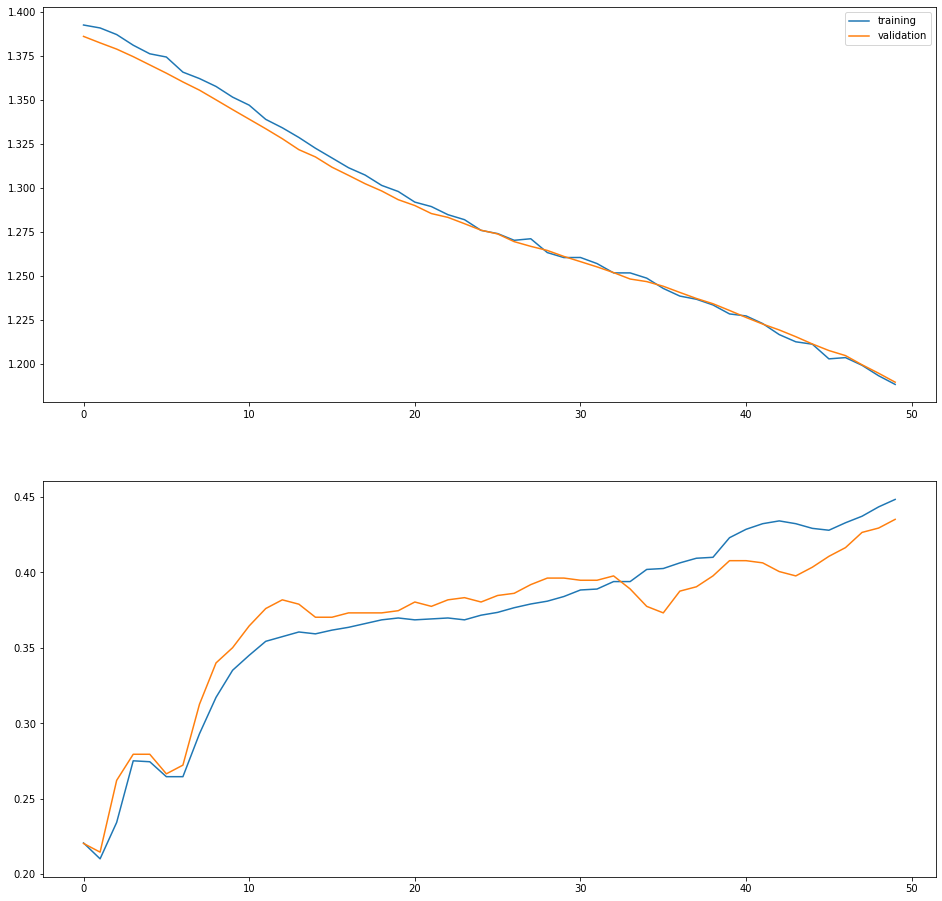

In [115]:
fig, ax = plt.subplots(2, figsize=(16, 16))

ax[0].plot(train_loss, label="training")
ax[0].plot(val_loss, label="validation")
ax[0].legend()

ax[1].plot(train_acc, label="training")
ax[1].plot(val_acc, label="validation")

In [ ]:
def